Importation des librairies

In [1]:
import time
import math
import numpy as np

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

Création des données d'apprentissage et de test

In [2]:
nbtirage=100
ec=0.3

X_test=np.arange(-0.5,3,0.002)
X_app=np.random.uniform(-0.5,3,nbtirage)
x1=np.sign(X_app-0.5)
x2=np.sign(X_test-0.5)
Y_app=np.sin(2*math.pi*(x1*X_app*X_app))+np.random.normal(0,ec,nbtirage)
#Y_test=np.sin(2*math.pi*(X_test*X_test))
Y_test=np.sin(2*math.pi*(x2*X_test*X_test))



Tracé des données

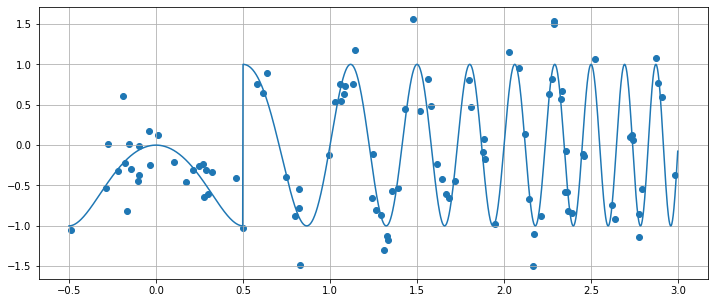

In [3]:
# #############################################################################
plt.figure(figsize=(12,5))
plt.plot(X_test, Y_test)
plt.scatter(X_app, Y_app)
plt.grid()
plt.show()

Apprentissage de la regression

In [4]:
gam=100
alph=0.51
alph=0.000001
#alph=0.


X_app=np.reshape(X_app, (nbtirage, 1))
X_test=np.reshape(X_test, (len(X_test), 1))

kr=KernelRidge(kernel='rbf', gamma=gam, alpha=alph)
kr.fit(X_app, Y_app)
Y_kr=kr.predict(X_test)

Tracé du résultat

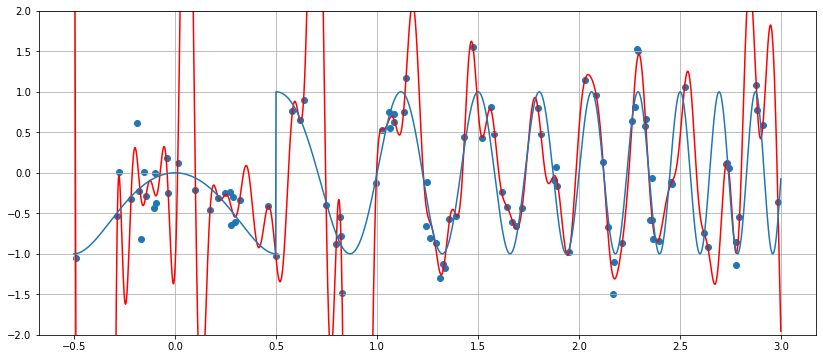

In [5]:
a=plt.figure(figsize=(12,5))
axes= a.add_axes([0.1,0.1,0.9,0.9])
axes.set_ylim([-2,2])
plt.plot(X_test, Y_kr,color='red')
plt.plot(X_test, Y_test)
plt.scatter(X_app, Y_app)
plt.grid()
plt.show()

Evaluation des performances

In [6]:
perf=sum((Y_test-Y_kr)*(Y_test-Y_kr))
print(perf)

709762.003164998


Conception de différents modèles, 50 échantillons d'apprentissage 

In [7]:
nbtirage=5
gam=50
X_test=np.arange(-0.5,3,0.002)
X_app=np.random.uniform(-0.5,3,nbtirage)
x1=np.sign(X_app-0.5)
x2=np.sign(X_test-0.5)
Y_app=np.sin(2*math.pi*(x1*X_app*X_app))+np.random.normal(0,ec,nbtirage)
Y_test=np.sin(2*math.pi*(x2*X_test*X_test))
#Y_test=np.sin(2*math.pi*(X_test*X_test))
X_app=np.reshape(X_app, (nbtirage, 1))
X_test=np.reshape(X_test, (len(X_test), 1))
res_err=np.zeros((100,1))
k=0
Valpha=np.logspace(start=-10,stop=2,num=100)
for alph in Valpha:
    kr=KernelRidge(kernel='rbf', gamma=gam, alpha=alph)
    kr.fit(X_app, Y_app)
    Y_kr=kr.predict(X_test)
    res_err[k]=sum((Y_test-Y_kr)*(Y_test-Y_kr))
    k=k+1

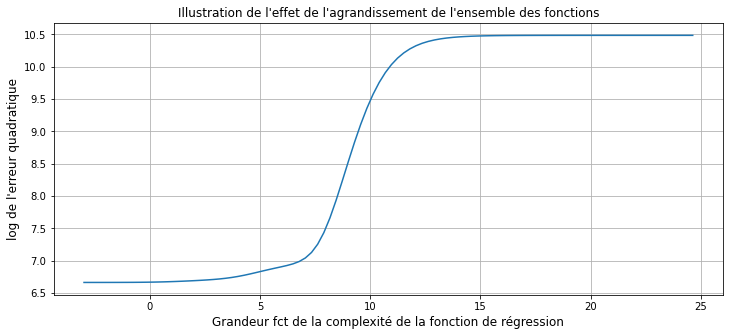

In [8]:
plt.figure(figsize=(12,5))
plt.plot(-np.log(Valpha/nbtirage),np.log(res_err))
plt.xlabel('Grandeur fct de la complexité de la fonction de régression', fontsize=12)
plt.ylabel('log de l\'erreur quadratique', fontsize=12)
plt.title('Illustration de l\'effet de l\'agrandissement de l\'ensemble des fonctions')           
plt.grid()
plt.show()

Conception de différents modèles, 100 échantillons d'apprentissage 

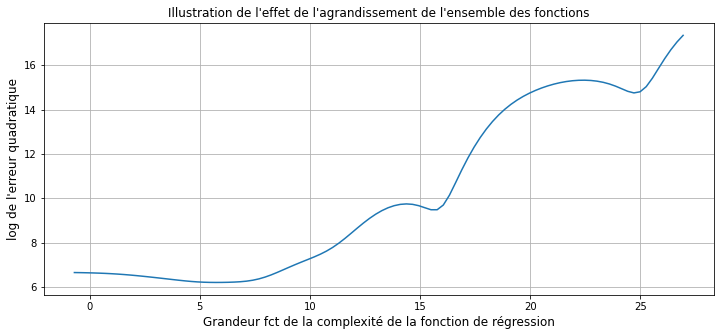

In [9]:
nbtirage=50


X_test=np.arange(-0.5,3,0.002)
X_app=np.random.uniform(-0.5,3,nbtirage)
x1=np.sign(X_app-0.5)
x2=np.sign(X_test-0.5)
Y_app=np.sin(2*math.pi*(x1*X_app*X_app))+np.random.normal(0,ec,nbtirage)
Y_test=np.sin(2*math.pi*(x2*X_test*X_test))
X_app=np.reshape(X_app, (nbtirage, 1))
X_test=np.reshape(X_test, (len(X_test), 1))
res_err=np.zeros((100,1))
k=0
Valpha=np.logspace(start=-10,stop=2,num=100)
for alph in Valpha:
    kr=KernelRidge(kernel='rbf', gamma=gam, alpha=alph)
    kr.fit(X_app, Y_app)
    Y_kr=kr.predict(X_test)
    res_err[k]=sum((Y_test-Y_kr)*(Y_test-Y_kr))
    k=k+1
    
plt.figure(figsize=(12,5))
plt.plot(-np.log(Valpha/nbtirage),np.log(res_err))
plt.xlabel('Grandeur fct de la complexité de la fonction de régression', fontsize=12)
plt.ylabel('log de l\'erreur quadratique', fontsize=12)
plt.title('Illustration de l\'effet de l\'agrandissement de l\'ensemble des fonctions')           
plt.grid()
plt.show()

Conception de différents modèles, 250 échantillons d'apprentissage 

100


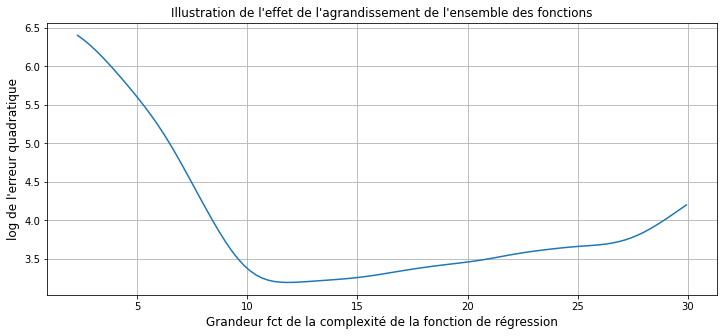

In [10]:
nbtirage=1000

X_test=np.arange(-0.5,3,0.002)
X_app=np.random.uniform(-0.5,3,nbtirage)
x1=np.sign(X_app-0.5)
x2=np.sign(X_test-0.5)
Y_app=np.sin(2*math.pi*(x1*X_app*X_app))+np.random.normal(0,ec,nbtirage)
Y_test=np.sin(2*math.pi*(x2*X_test*X_test))
X_app=np.reshape(X_app, (nbtirage, 1))
X_test=np.reshape(X_test, (len(X_test), 1))


res_err=np.zeros((100,1))
k=0
Valpha=np.logspace(start=-10,stop=2,num=100)
for alph in Valpha:
    kr=KernelRidge(kernel='rbf', gamma=gam, alpha=alph)
    kr.fit(X_app, Y_app)
    Y_kr=kr.predict(X_test)
    res_err[k]=sum((Y_test-Y_kr)*(Y_test-Y_kr))
    k=k+1
print(k)    
plt.figure(figsize=(12,5))
plt.plot(-np.log(Valpha/nbtirage),np.log(res_err))
plt.xlabel('Grandeur fct de la complexité de la fonction de régression', fontsize=12)
plt.ylabel('log de l\'erreur quadratique', fontsize=12)
plt.title('Illustration de l\'effet de l\'agrandissement de l\'ensemble des fonctions')           
plt.grid()
plt.show()

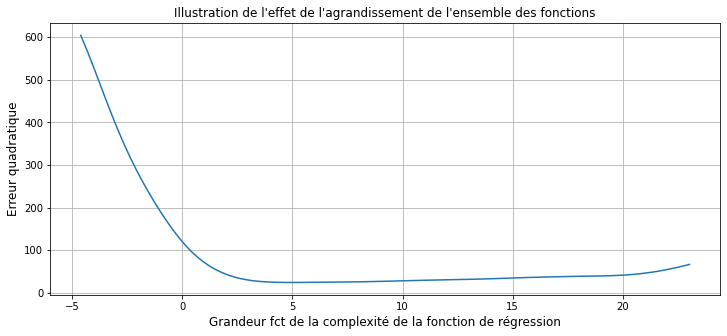

In [11]:
plt.figure(figsize=(12,5))
plt.plot(-np.log(Valpha),(res_err))
plt.xlabel('Grandeur fct de la complexité de la fonction de régression', fontsize=12)
plt.ylabel('Erreur quadratique', fontsize=12)
plt.title('Illustration de l\'effet de l\'agrandissement de l\'ensemble des fonctions')           
plt.grid()
plt.show()

In [23]:
np.log(Valpha)


array([-23.02585093, -22.74674971, -22.46764848, -22.18854726,
       -21.90944604, -21.63034481, -21.35124359, -21.07214237,
       -20.79304114, -20.51393992, -20.2348387 , -19.95573747,
       -19.67663625, -19.39753503, -19.1184338 , -18.83933258,
       -18.56023136, -18.28113013, -18.00202891, -17.72292769,
       -17.44382646, -17.16472524, -16.88562402, -16.60652279,
       -16.32742157, -16.04832035, -15.76921912, -15.4901179 ,
       -15.21101667, -14.93191545, -14.65281423, -14.373713  ,
       -14.09461178, -13.81551056, -13.53640933, -13.25730811,
       -12.97820689, -12.69910566, -12.42000444, -12.14090322,
       -11.86180199, -11.58270077, -11.30359955, -11.02449832,
       -10.7453971 , -10.46629588, -10.18719465,  -9.90809343,
        -9.62899221,  -9.34989098,  -9.07078976,  -8.79168854,
        -8.51258731,  -8.23348609,  -7.95438487,  -7.67528364,
        -7.39618242,  -7.1170812 ,  -6.83797997,  -6.55887875,
        -6.27977753,  -6.0006763 ,  -5.72157508,  -5.44

In [37]:
Valpha


array([1.00000000e-10, 1.32194115e-10, 1.74752840e-10, 2.31012970e-10,
       3.05385551e-10, 4.03701726e-10, 5.33669923e-10, 7.05480231e-10,
       9.32603347e-10, 1.23284674e-09, 1.62975083e-09, 2.15443469e-09,
       2.84803587e-09, 3.76493581e-09, 4.97702356e-09, 6.57933225e-09,
       8.69749003e-09, 1.14975700e-08, 1.51991108e-08, 2.00923300e-08,
       2.65608778e-08, 3.51119173e-08, 4.64158883e-08, 6.13590727e-08,
       8.11130831e-08, 1.07226722e-07, 1.41747416e-07, 1.87381742e-07,
       2.47707636e-07, 3.27454916e-07, 4.32876128e-07, 5.72236766e-07,
       7.56463328e-07, 1.00000000e-06, 1.32194115e-06, 1.74752840e-06,
       2.31012970e-06, 3.05385551e-06, 4.03701726e-06, 5.33669923e-06,
       7.05480231e-06, 9.32603347e-06, 1.23284674e-05, 1.62975083e-05,
       2.15443469e-05, 2.84803587e-05, 3.76493581e-05, 4.97702356e-05,
       6.57933225e-05, 8.69749003e-05, 1.14975700e-04, 1.51991108e-04,
       2.00923300e-04, 2.65608778e-04, 3.51119173e-04, 4.64158883e-04,
      